## Домашнее задание по теме "Работа с переменными"

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt 

In [17]:
# Загружаем датасет
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
# изучаем содержание
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
data.shape

(506, 14)

In [21]:
# Пробуем обучить модель без предварительной обработки данных
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [22]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [23]:
get_score(X,y)

0.711226005748496

In [24]:
# начинаем изучать датасет. Пропусков нет. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [55]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


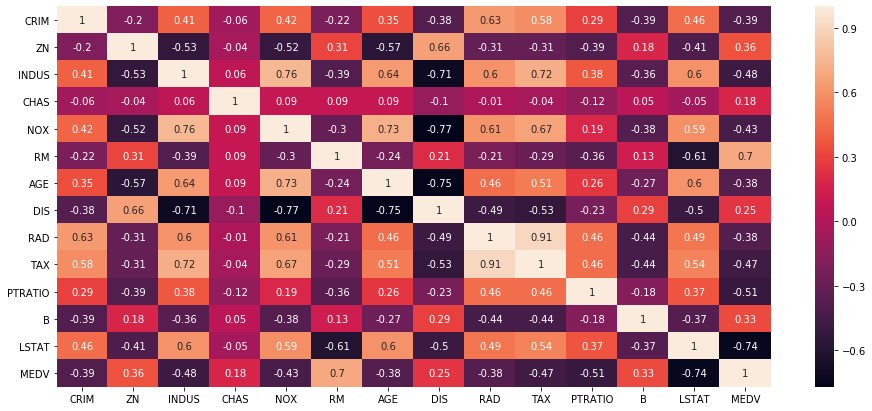

In [25]:
# Построим матрицу корреляций, чтобы посмотреть взаимосвязь между переменными. 
correlation_matrix = data.corr().round(2)

plt.figure(figsize=(16,7)) 
sns.heatmap(data=correlation_matrix, annot=True)


In [74]:
# Можно заметить, что переменные RAD и TAX имеют коэффициент корреляции 0.91, при этом TAX в большей степени коррелирует 
# с искомым параметром. Отбросим ТАХ.

data1 = data.drop(['RAD'], axis = 1)

In [75]:
X = data1.drop(['MEDV'], axis = 1)
y = data1['MEDV']

get_score(X,y)

# точность упала, вывод неверный

0.6883010754490897

In [79]:
# Пострим boxplots, чтобы проверить данные на выбросы 
def get_boxplot1(X):
  for i in X:
    sns.boxplot(X[i])
    plt.show()
  pass  

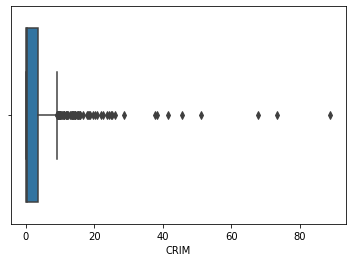

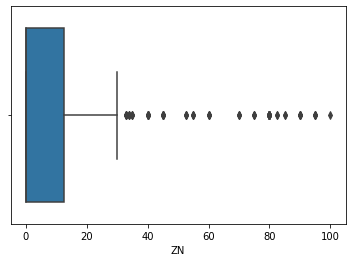

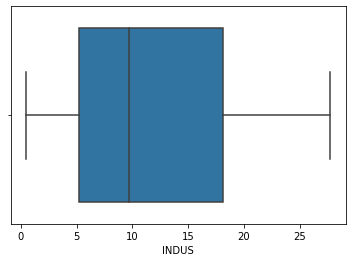

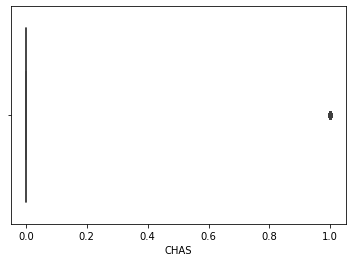

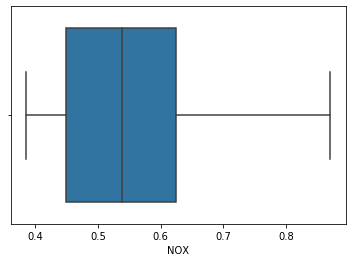

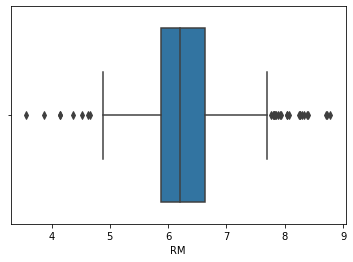

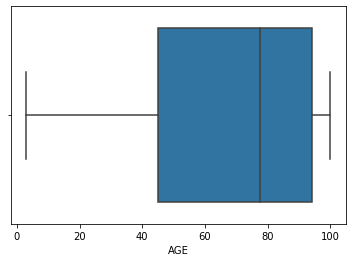

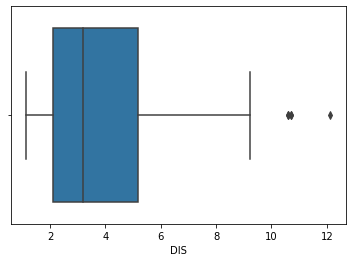

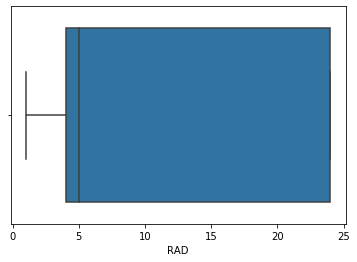

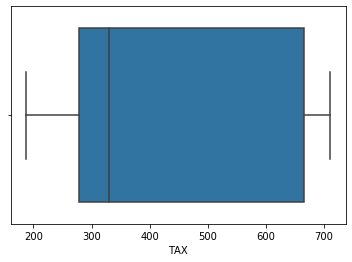

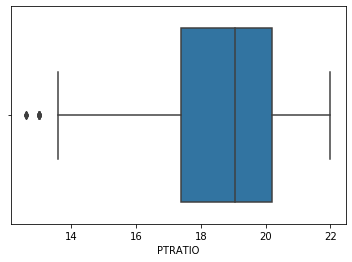

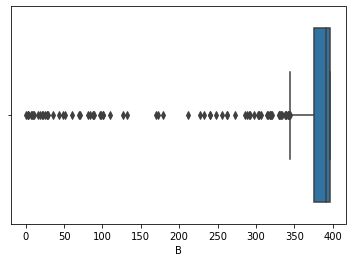

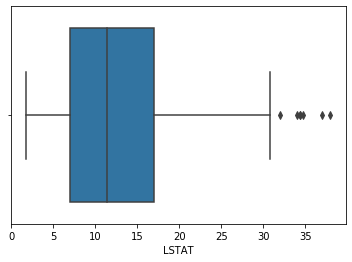

In [80]:
X = data.drop(['MEDV'], axis = 1)
get_boxplot1(X)

In [130]:
# На графике видно что у переменной CRIM большое количество выбросов. Попробуем отбросить самые значительные из них. 
data1 = data.loc[data['CRIM'] < 15]
data1.shape

(476, 14)

In [131]:
X = data1.drop(['MEDV'], axis = 1)
y = data1['MEDV']

get_score(X,y)

0.7985025523104178

In [132]:
# нормализуем данные 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data1) 
data1.loc[:,:] = scaled_values
data1.describe()

D:\DS\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,0.136858,0.120798,0.375290,0.073529,0.333907,0.529853,0.658941,0.254883,0.332115,0.391205,0.611233,0.912129,0.307729,0.388689
std,0.239546,0.238667,0.250722,0.261278,0.236877,0.129192,0.289654,0.190481,0.354781,0.306165,0.232556,0.207234,0.195879,0.204075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004954,0.000000,0.164589,0.000000,0.129630,0.450805,0.405510,0.098223,0.130435,0.171756,0.457447,0.949121,0.151256,0.266590
50%,0.014701,0.000000,0.281525,0.000000,0.286008,0.510922,0.735839,0.205935,0.173913,0.242366,0.648936,0.986900,0.267554,0.352403
75%,0.141257,0.200000,0.646628,0.000000,0.471193,0.588427,0.925335,0.378079,0.304348,0.477099,0.808511,0.997932,0.427815,0.459954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
# Результат не изменился 

X = data1.drop(['MEDV'], axis = 1)
y = data1['MEDV']

get_score(X,y)

0.7985025523104156